# Exploring the diamonds data set.

This IPython notebook takes a look at the diamonds data set. We first do some exploratory data analysis followed by some visualization and modeling.

* **Contents**
   - [Modules Used](#Modules-Used)
   - [Exploratory Data Analysis](#Exploratory-Data-Analysis)
      * [Data Attributes](#Data-Attributes)
      * [Basic Data Stats](#Basic-Data-Stats)
         * [Mean Prices by Cut](#Mean-Prices-by-Cut)
         * [Mean Prices by Cut and Color](#Mean-Prices-by-Cut-and-Color)
         * [What about clarity?](#What-about-clarity?)
         * [Where's the missing data?](#Where's-the-missing-data?)
   - [Data Visualization](#Data-Visualization)
      * [Histogram of Prices](#Histogram-of-Prices)
      * [Skewness Test](#Skewness-Test)
      * [Prices by cut](#Prices-by-cut)
      * [Prices by carat](#Prices-by-carat)
   - Modeling

## Modules Used


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from seaborn import load_dataset
import seaborn as sns


## Exploratory Data Analysis

To begin our analysis, we need to first get a general idea of what our  dataset looks like. To do this, we shall first take a look at a few common procedures in exploratory data analysis.


In [4]:
# Loading the data set
diamonds = load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Having taken a peak at our data set, there are a few things that need to be done. 
First, we need to have a general understanding of what the columns stand for. For instance, it would be hard to understand what x, y and z stood for unless you had prior knowledge about the data set.

### Data Attributes

There are a couple of ways to find out what the column mean: One could simply guess that x, y and z refer to the lengths, widths and heights of the diamonds. One could also do a simple web search. 

Preferably, one can take a look at the dataset's documentation as shown next. Regrettably, the data set is not well documented by the package authors.

In [8]:
#?diamonds

However, a web [search](https://rstudio-pubs-static.s3.amazonaws.com/316651_5c92e58ef8a343e4b3f618a7b415e2ad.html) does identify what the columns mean and x, y, z are as guessed above.


## Basic Data Stats

Before, taking a look at the data's basic statistics, it might be useful to give the data more meanignful names. To do that, we shall use a data frame(`DataFrame`)'s `rename` method with a `dictionary` mapping.  Since the default is to set `inplace` to `False`, we can set that to `True`.

In [19]:
diamonds.rename(columns = {'x': 'length', 'y': 'width', 'z': 'height'}, inplace = True)
diamonds.head()


,carat,cut,color,clarity,depth,table,price,length,width,height
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Since we are now more comfortable with the dataset's column names since they are more informative, we can proceed to look at the basic stats.

In [20]:
diamonds.describe()

,carat,depth,table,price,length,width,height
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


From the above, we can see that the mean price was high. However, looking at these statistics is less informative since these may vary by cut, color, clarity or depth. Therefore looking at these statistics by group could be more informative.

## Mean Prices by Cut

In [32]:
diamonds.groupby("cut").apply(np.mean)

,carat,depth,table,price,length,width,height
cut,,,,,,,
Fair,1.046137,64.041677,59.053789,4358.757764,6.246894,6.182652,3.982770
Good,0.849185,62.365879,58.694639,3928.864452,5.838785,5.850744,3.639507
Ideal,0.702837,61.709401,55.951668,3457.541970,5.507451,5.520080,3.401448
Premium,0.891955,61.264673,58.746095,4584.257704,5.973887,5.944879,3.647124
Very Good,0.806381,61.818275,57.956150,3981.759891,5.740696,5.770026,3.559801


From the above, it is clearer that the mean prices for instance as one might have expected vary by cut. There is an almost linear relationship between cut and price. It is also interesting to note that the mean depth does not vary that much across the different cut(s).

We can take the above a step further by looking at how prices for instance vary when the data is grouped by both cut and color.

## Mean Prices by Cut and Color

In [34]:
diamonds.groupby(["cut", "color"]).apply(np.mean)

carat      depth      table        price    length  \
cut       color                                                          
Fair      D      0.920123  64.048466  58.969325  4291.061350  6.018344   
          E      0.856607  63.319643  59.364732  3682.312500  5.909062   
          F      0.904712  63.508013  59.453205  3827.003205  5.990513   
          G      1.023822  64.339809  58.773248  4239.254777  6.173822   
          H      1.219175  64.585149  58.696370  5135.683168  6.579373   
...                   ...        ...        ...          ...       ...   
Very Good F      0.740961  61.721627  57.848429  3778.820240  5.610504   
          G      0.766799  61.841279  57.784428  3872.753806  5.660204   
          H      0.915948  61.968366  57.903015  4535.390351  5.982286   
          I      1.046952  61.934551  58.105150  5255.879568  6.272259   
          J      1.133215  61.902065  58.277729  5103.513274  6.460782   

                    width    height  
cut       color                      
Fair      D      5.963190  3.839877  
          E      5.858214  3.722143  
          F      5.931122  3.787821  
          G      6.114076  3.963153  
          H      6.497393  4.219373  
...                   ...       ...  
Very Good F      5.642717  3.472902  
          G      5.688752  3.509883  
          H      6.006272  3.713849  
          I      6.299028  3.890972  
          J      6.495074  4.006873  

[35 rows x 7 columns]

The nature of the display does not allow for a great interpretation of the data. However, from the few fields shown, we can seee a clear difference in prices with respect to color. 
## What about clarity?

In [38]:
diamonds.groupby("clarity").apply(np.mean)

,carat,depth,table,price,length,width,height
clarity,,,,,,,
I1,1.283846,62.734278,58.303779,3924.168691,6.761093,6.709379,4.207908
IF,0.505123,61.510615,56.507207,2864.839106,4.968402,4.989827,3.061659
SI1,0.850482,61.853042,57.662541,3996.001148,5.888383,5.888256,3.639845
SI2,1.077648,61.772167,57.927181,5063.028606,6.401370,6.397826,3.948478
VS1,0.727158,61.667458,57.315151,3839.455391,5.572178,5.581828,3.441007
VS2,0.763935,61.724417,57.417401,3924.989395,5.657709,5.658859,3.491478
VVS1,0.503321,61.624651,56.884460,2523.114637,4.960364,4.975075,3.061294
VVS2,0.596202,61.663778,57.024990,3283.737071,5.218454,5.232118,3.221465


The focus of our analysis has upto now been on the mean prices. It is worth noting what the clarity actually [means](https://ggplot2.tidyverse.org/reference/diamonds.html): **a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))**. With that in mind, the mean prices appear to follow a non linear relationship with respect to clarity. We will verify this as the notebook progresses statistically. 

Having look at a few basic stats about the data(remember we focused entirely on the mean), we now take a different route. We need to visualize our data which might reveal more trends and perhaps provide a more informative picture. However, important for modeling purposes is whether we have missing data.

## Where's the missing data?

There are several ways to find missing data, but we will represent it as the percentage of each column that is missing.

In [49]:
diamonds.apply(lambda x: sum(x.notnull())/len(x) * 100)

carat      100.0
cut        100.0
color      100.0
clarity    100.0
depth      100.0
table      100.0
price      100.0
length     100.0
width      100.0
height     100.0
dtype: float64

From the above, we can see that all our columns in fact have 100% of the data which is great. We can then proceed with data visualization.
## Data Visualization

## Histogram of Prices

To visualize the prices, we can either use `matplotlib`, `pandas` or `seaborn` amongst other libraries. We shall use `matplotlib`'s `hist`.

Text(0.5, 0, 'Prices(USD)')

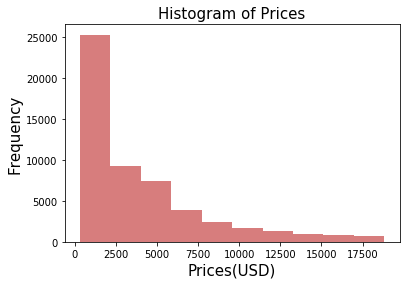

In [75]:
%matplotlib inline
plt.figure()
plt.hist(x = "price", data = diamonds, color = "indianred", alpha = 0.8)
plt.title("Histogram of Prices", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.xlabel("Prices(USD)", fontsize = 15)


From the above we it appears(as one might expect), the distribution of prices is **skewed to the right** ie as the prices increase, the number of diamonds decrease. We can carry out a skewness test using `scipy`'s `stats` module to verify this.

## Skewness Test

In [78]:
from scipy.stats import skew
skew(diamonds["price"])

1.6183502776053016

From the above, our skew is a positive value(greater than 1) indicating a positive skewness which means that our mean is greater than the median. Let us look at our data's median and mean prices to verify.

In [80]:
from IPython.display import display
display(np.mean(diamonds["price"]))
display(np.median(diamonds["price"]))

3932.799721913237

2401.0

## Prices by cut

For this part, we shall uses `seaborn`'s awesome functions that deal with categorical plots.

Text(0.5, 1.0, 'Prices by cut')

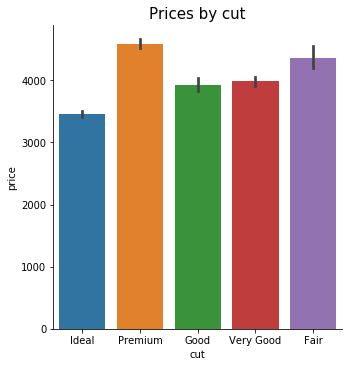

In [88]:
sns.catplot(x="cut", y="price",kind="bar", data = diamonds)
plt.title("Prices by cut", fontsize = 15)

As shown in [Mean Prices by Cut](#Mean-Prices-by-Cut), the prices do vary by cut and as already stated the relatioship appears to be linear ie as the quality(cut) of the diamond increases, so does its price. There will however always be outliers.  Let us take a look at the prices by carat.

## Prices by carat

Text(0, 0.5, 'Price')

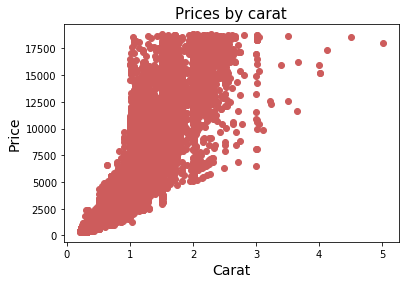

In [98]:
plt.scatter(x = "carat", y = "price", data = diamonds, color = "indianred")
plt.title("Prices by carat", fontsize = 15)
plt.xlabel("Carat", fontsize = 14)
plt.ylabel("Price", fontsize = 14)

In general, the distribution of the prices is such that most of the diamonds fall in the lower half. On the issue of outliers, there are visible outliers for instance 5 carat diamonds which is a bit unusual. 